# Import

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from pd_replicator import replicator
from sklearn.model_selection import GridSearchCV


pd.set_option("display.max_columns", None)


# Path and Train

In [39]:
# Specify the path to the dataset
path = "icr-identify-age-related-conditions/"

# Load the training data
train_data = pd.read_csv(path + 'train.csv')

In [40]:
# Perform EDA and data preprocessing
print(train_data.head())

             Id        AB          AF          AH         AM        AR   
0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407  8.138688  \
1  007255e47698  0.145282   978.76416   85.200147  36.968889  8.138688   
2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553  8.138688   
3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203  8.138688   
4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738  8.138688   

         AX        AY         AZ          BC         BD        BN          BP   
0  0.699861  0.025578   9.812214    5.555634  4126.58731  22.5984  175.638726  \
1  3.632190  0.025578  13.517790    1.229900  5496.92824  19.4205  155.868030   
2  6.732840  0.025578  12.824570    1.229900  5135.78024  26.4825  128.988531   
3  3.685344  0.025578  11.053708    1.229900  4169.67738  23.6577  237.282264   
4  3.942255  0.054810   3.396778  102.151980  5728.73412  24.0108  324.546318   

           BQ           BR          BZ         CB        CC        C

In [41]:
print(train_data.shape)

(617, 58)


In [42]:
print(train_data.dtypes)

Id        object
AB       float64
AF       float64
AH       float64
AM       float64
AR       float64
AX       float64
AY       float64
AZ       float64
BC       float64
BD       float64
BN       float64
BP       float64
BQ       float64
BR       float64
BZ       float64
CB       float64
CC       float64
CD       float64
CF       float64
CH       float64
CL       float64
CR       float64
CS       float64
CU       float64
CW       float64
DA       float64
DE       float64
DF       float64
DH       float64
DI       float64
DL       float64
DN       float64
DU       float64
DV       float64
DY       float64
EB       float64
EE       float64
EG       float64
EH       float64
EJ        object
EL       float64
EP       float64
EU       float64
FC       float64
FD       float64
FE       float64
FI       float64
FL       float64
FR       float64
FS       float64
GB       float64
GE       float64
GF       float64
GH       float64
GI       float64
GL       float64
Class      int64
dtype: object


In [43]:
# Summary statistics of the dataset
print("\nSummary statistics:")
replicator(train_data.describe())


Summary statistics:


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,557.000000,617.000000,617.000000,615.000000,614.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,557.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,21.419492,231.322223,98.328737,1218.133238,550.632525,77.104151,0.688801,90.251735,11.241064,0.030615,1.403761,0.742262,36.917590,1.383792,27.165653,51.128326,401.901299,0.633884,0.367002,146.972099,94.795377,26.370568,1.802900,1.924830,26.388989,9.072700,3.064778,1731.248215,0.305107,69.582596,105.060712,69.117005,71.341526,6.930086,10306.810737,10.111079,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,3.478278,183.992505,96.479371,7575.293707,2076.371275,159.049302,0.263994,51.585130,13.571133,0.014808,1.922210,0.281195,17.266347,0.538717,14.645993,21.210888,317.745623,1.912384,0.112989,86.084419,28.243187,8.038825,9.034721,1.484555,18.116679,6.200281,2.058344,1790.227476,1.847499,38.555707,68.445620,390.187057,165.551545,64.754262,11331.294051,2.934025,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,9.886800,72.948951,1.331155,51.216883,257.432377,12.499760,0.176874,23.387600,0.510888,0.003184,1.050225,0.069225,13.784111,0.137925,7.030640,6.906400,35.998895,0.238680,0.040995,60.232470,10.345600,6.339496,0.005518,1.743070,0.804068,4.926396,0.286201,185.594100,0.003042,5.394675,78.526968,3.828384,7.534128,0.296850,1563.136688,3.583450,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,19.420500,156.847239,27.834425,424.990642,257.432377,23.317567,0.563688,64.724192,5.066306,0.023482,1.050225,0.589575,29.782467,1.070298,7.030640,37.942520,188.815690,0.238680,0.295164,102.703553,78.232240,20.888264,0.005518,1.743070,14.715792,5.965392,1.648679,1111.160625,0.003042,30.927468,78.526968,4.324656,25.815384,0.296850,5164.666260,8.523098,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,21.186000,193.908816,61.642115,627.417402,257.432377,42.554330,0.658715,79.819104,9.123000,0.027860,1.050225,0.730800,34.835130,1.351665,36.019104,49.180940,307.509595,0.238680,0.358023,130.050630,96.264960,25.248800,0.251741,1.743070,21.642456,8.149404,2.616119,1493.817413,0.085176,71.949306,78.526968,22.641144,36.394008,1.870155,7345.143424,9.945452,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,23.657700,247.803462,134.009015,975.649259,257.432377,77.310097,0.772206,99.813520,13.565901,0.034427,1.228445,0.859350,40.529401,1.660617,37.935832,61.408760,507.896200,0.238680,0.426348,165.836955,110.640680,30.544224,1.058690,1.743070,34.058344,10.503048,3.910070,1905.701475,0.237276,109.125159,112.766654,49.085352,56.714448,4.88021

In [44]:
# Count the number of missing values in each column
print("\nMissing values:")
print(train_data.isnull().sum())


Missing values:
Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64


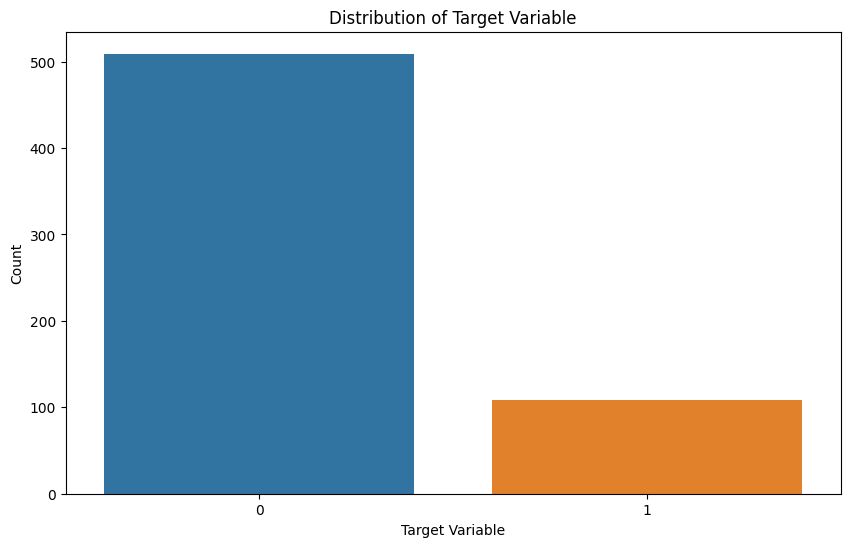

In [45]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=train_data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

In [46]:
train_data['Class'].value_counts()

Class
0    509
1    108
Name: count, dtype: int64

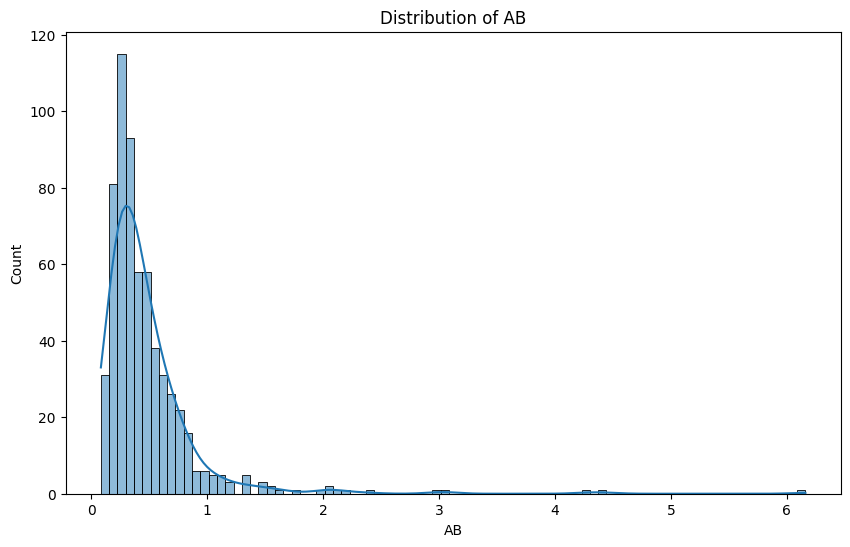

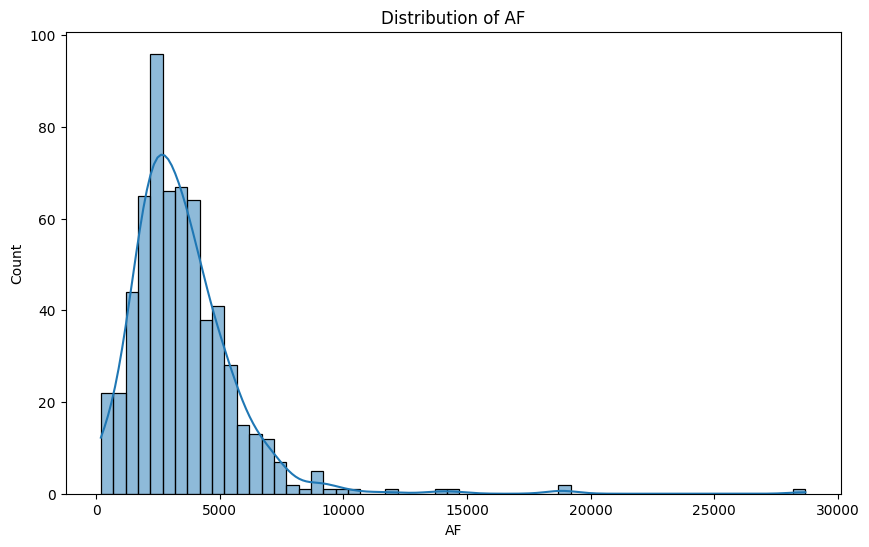

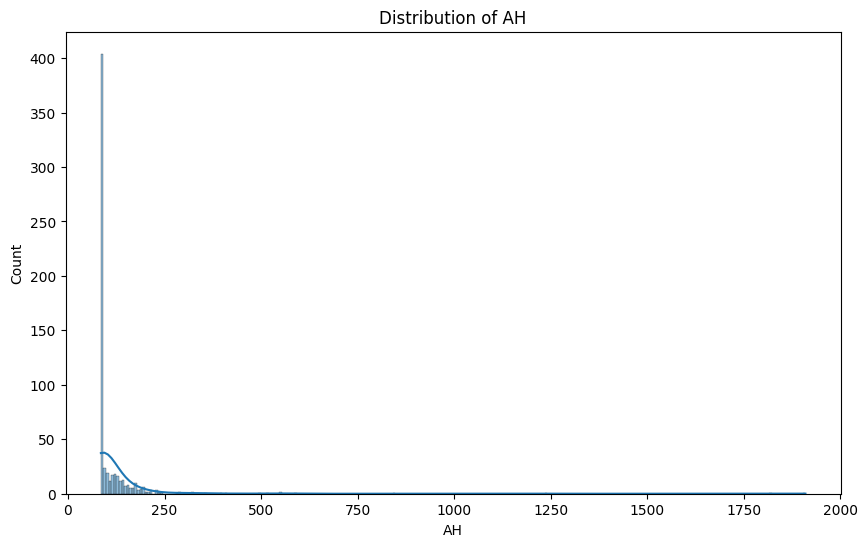

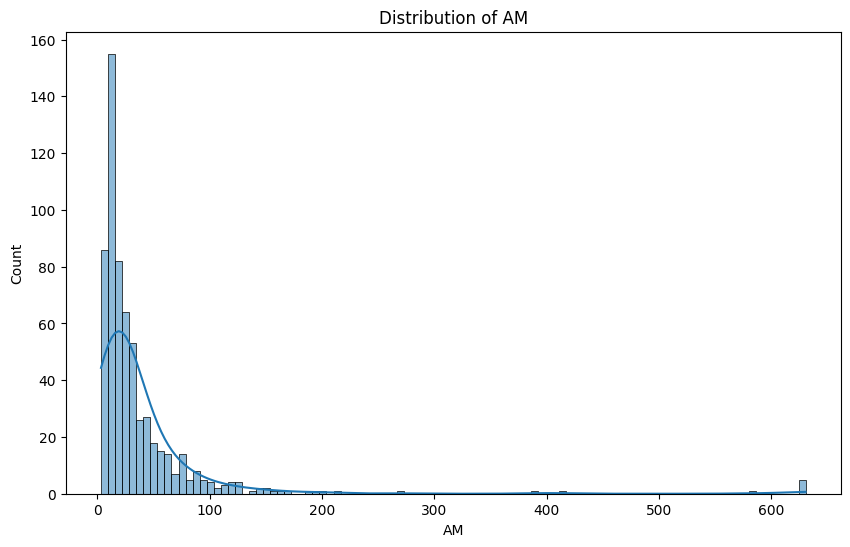

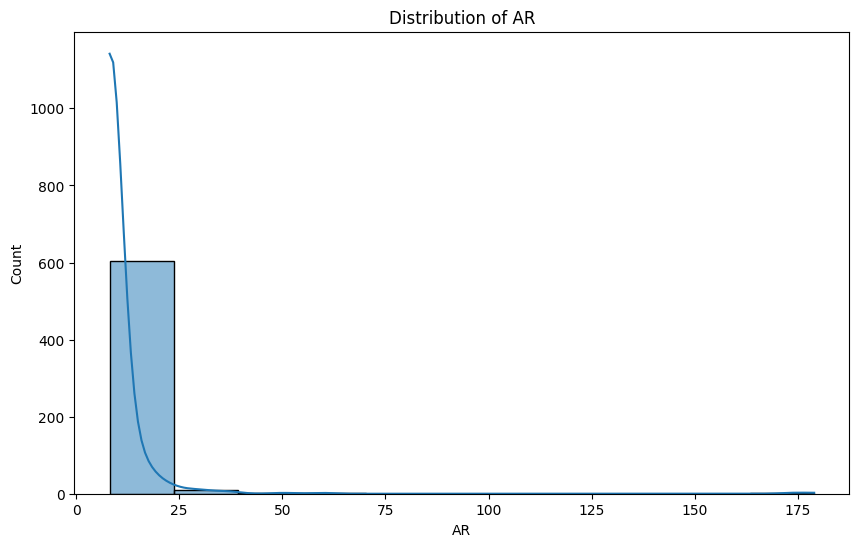

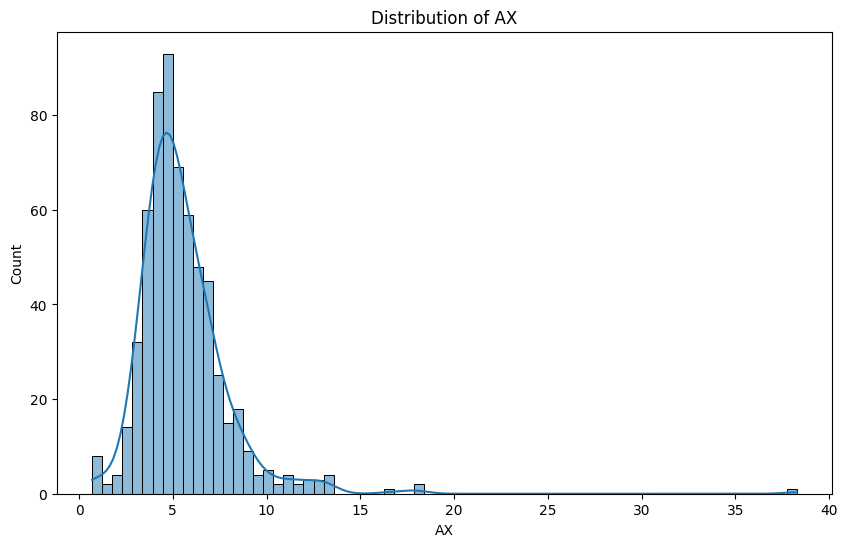

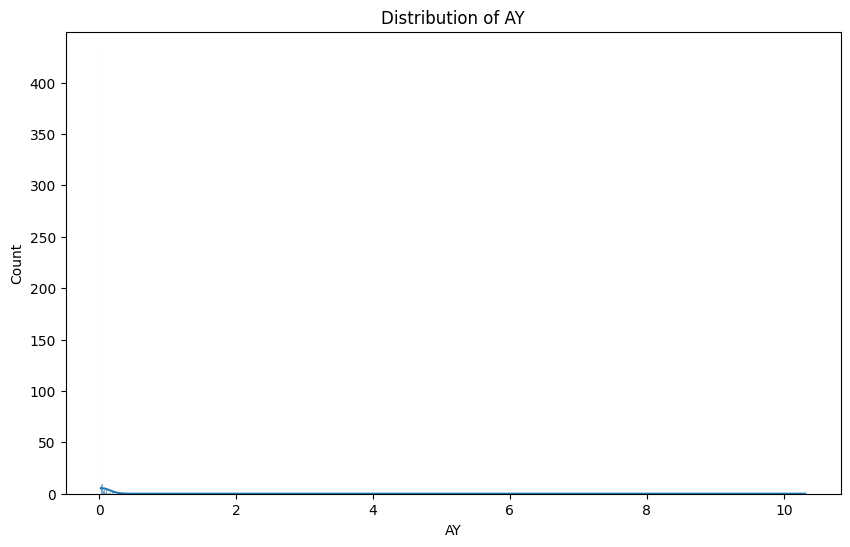

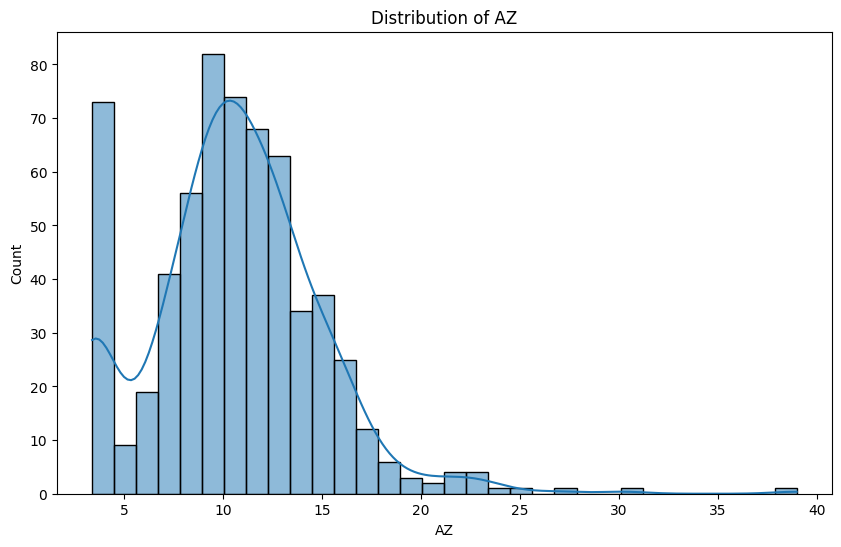

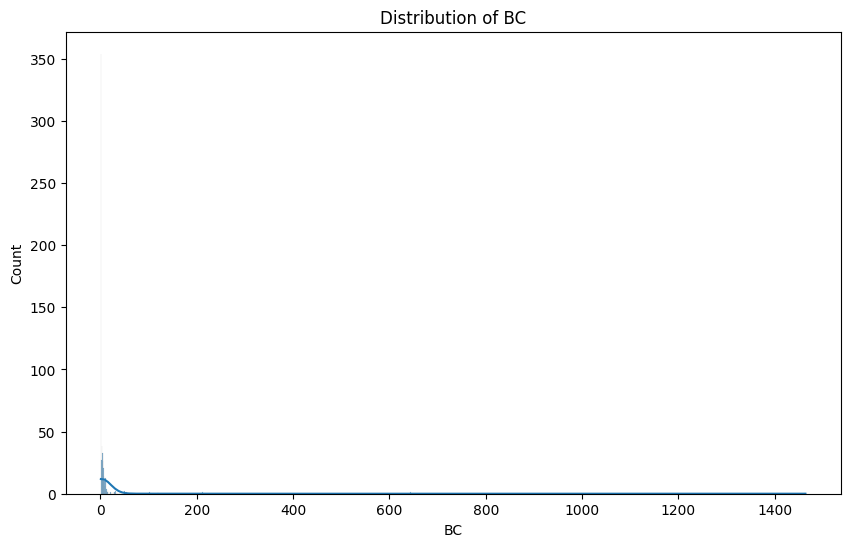

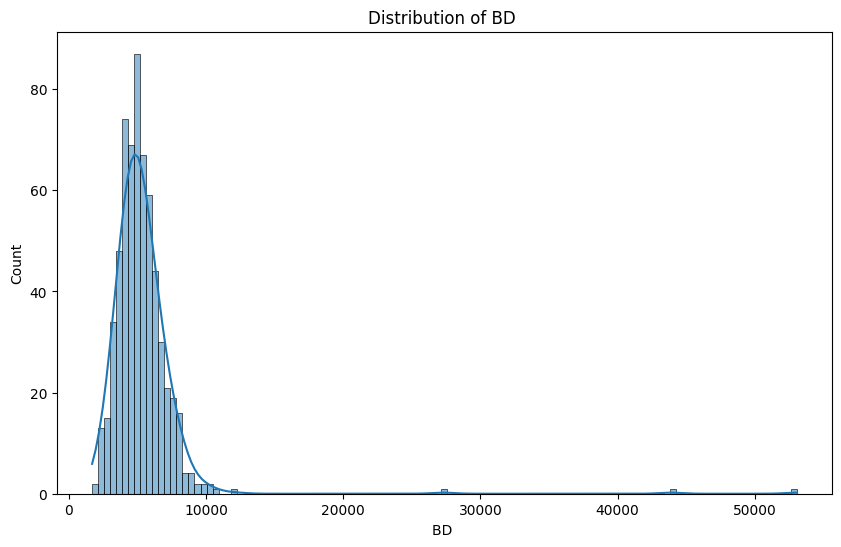

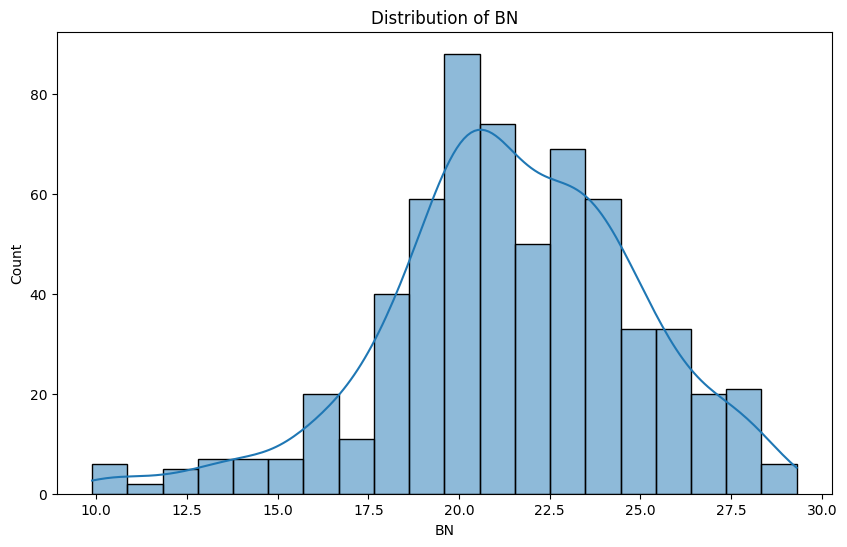

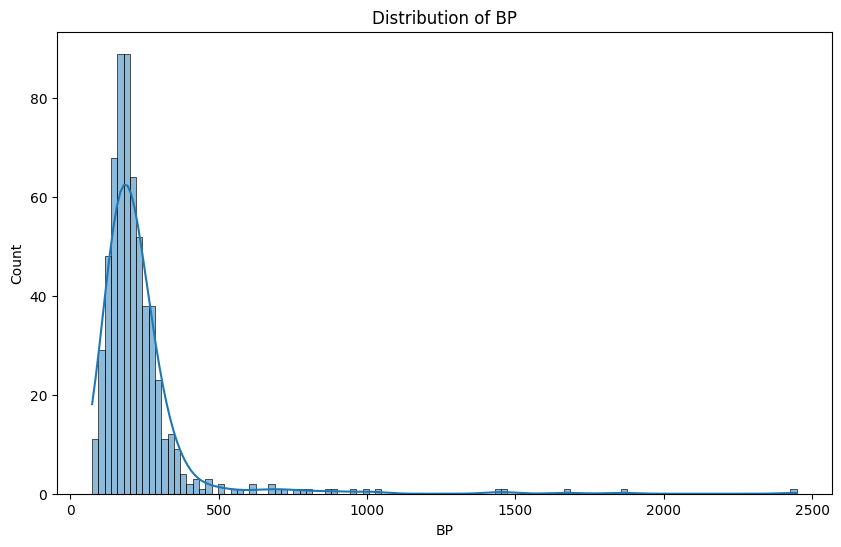

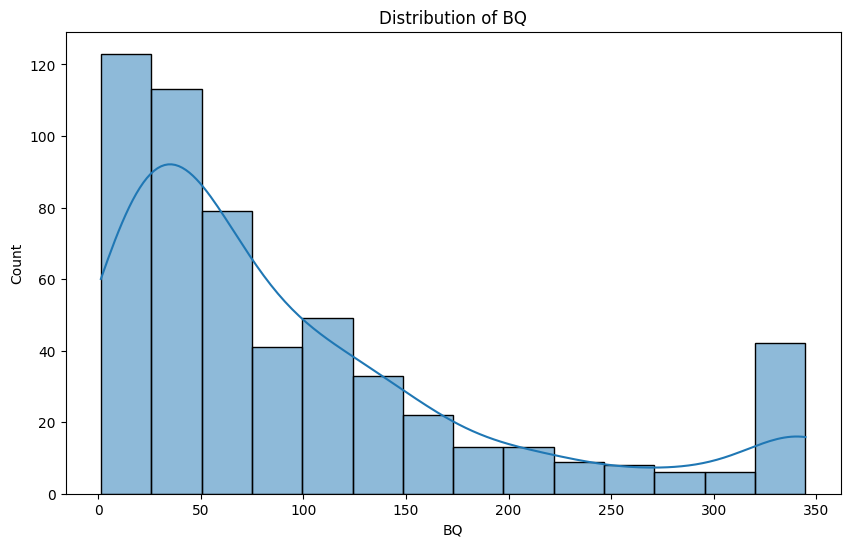

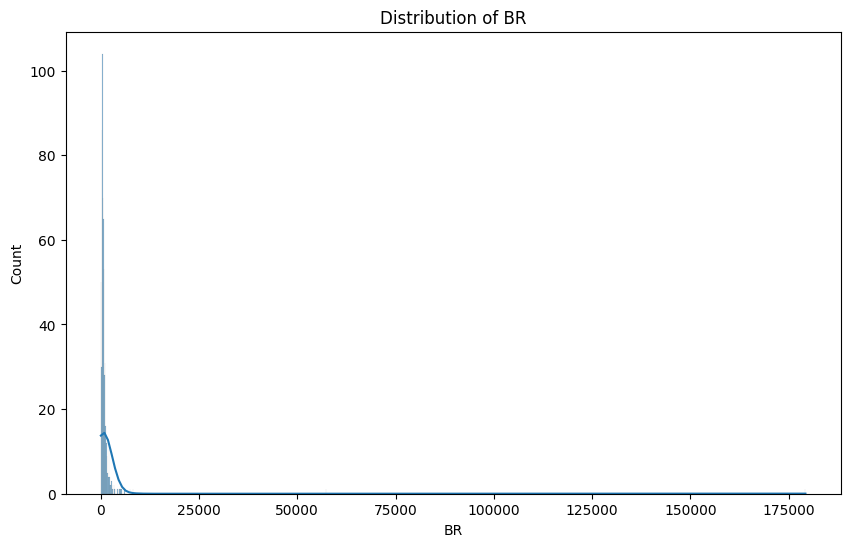

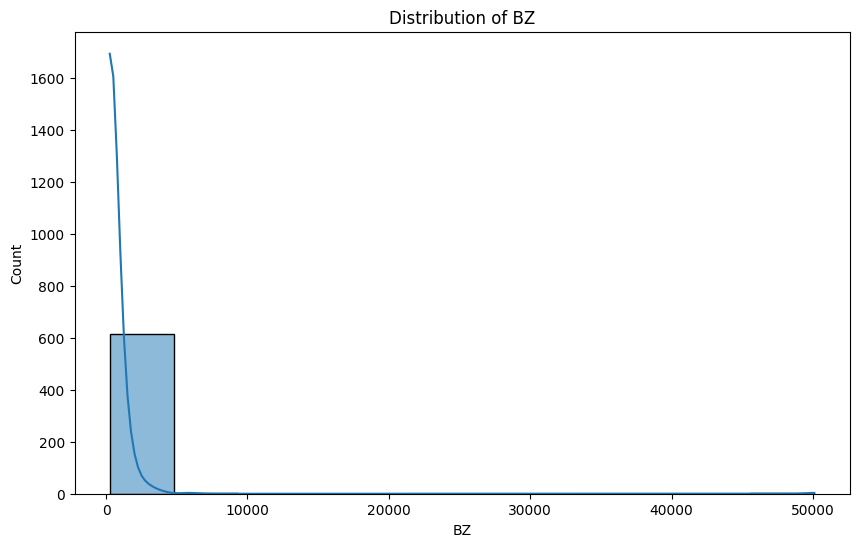

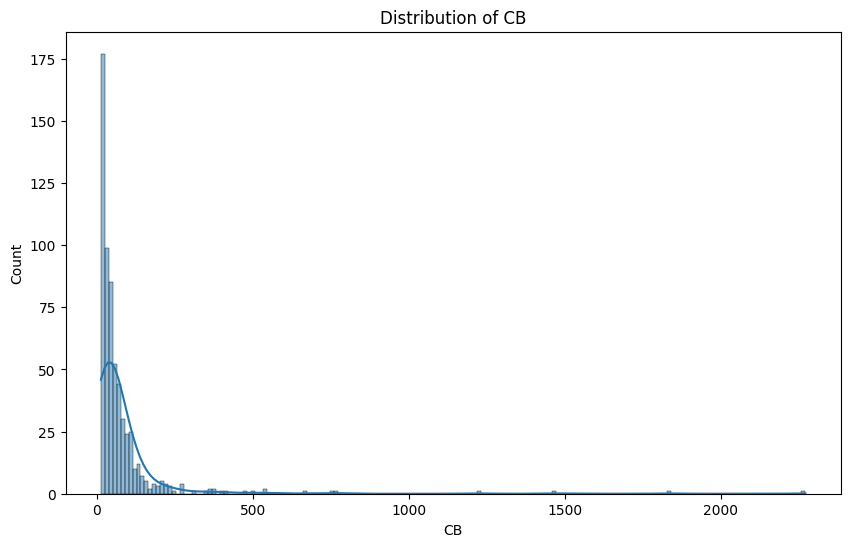

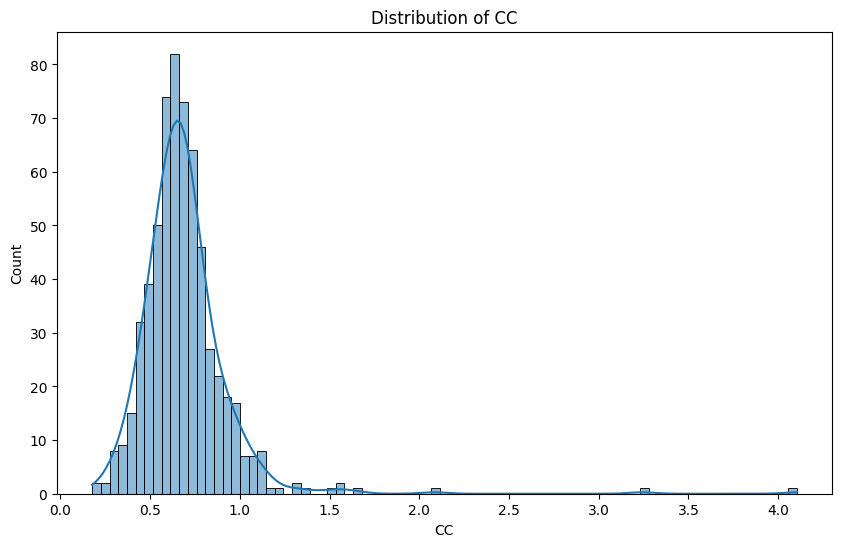

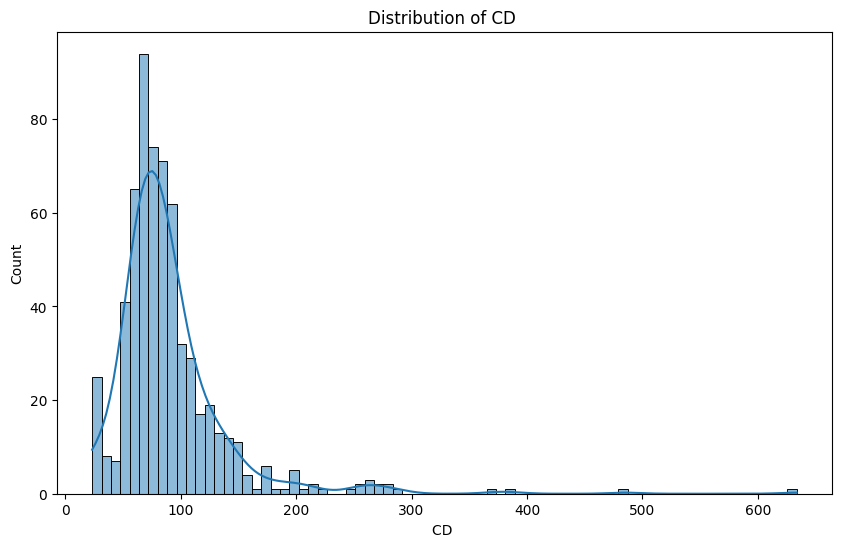

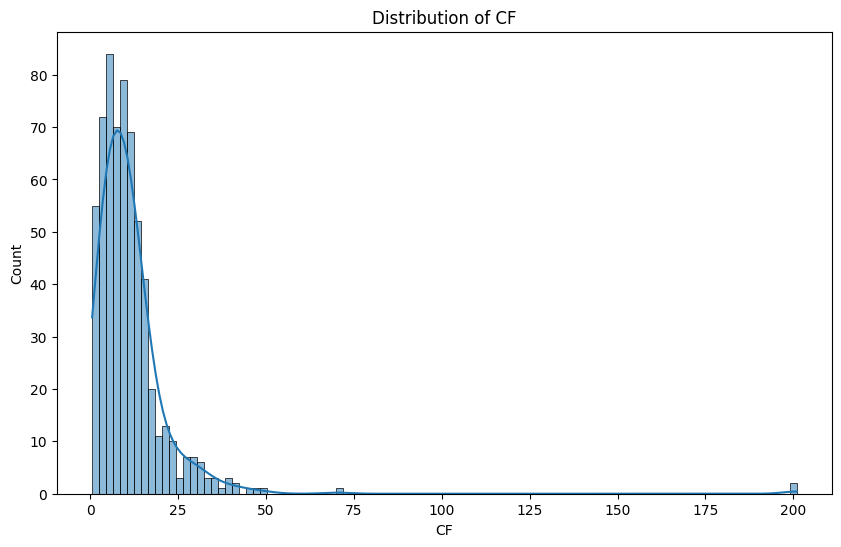

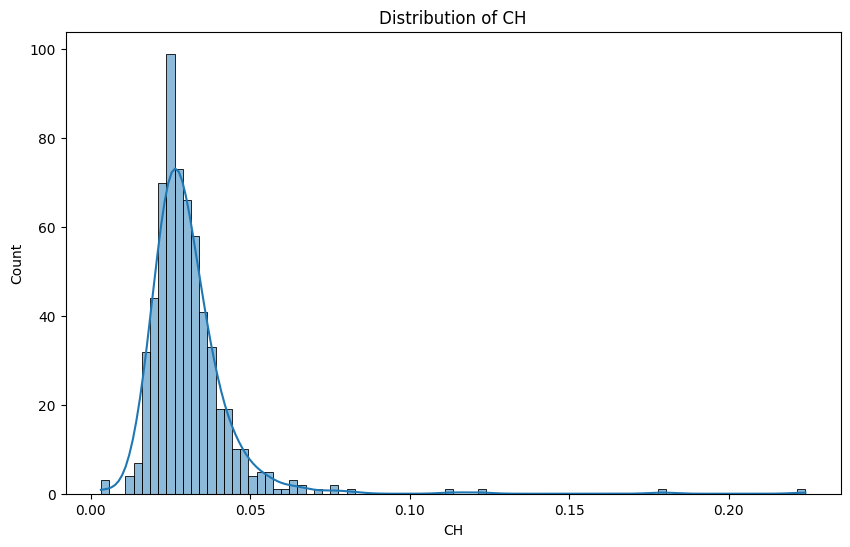

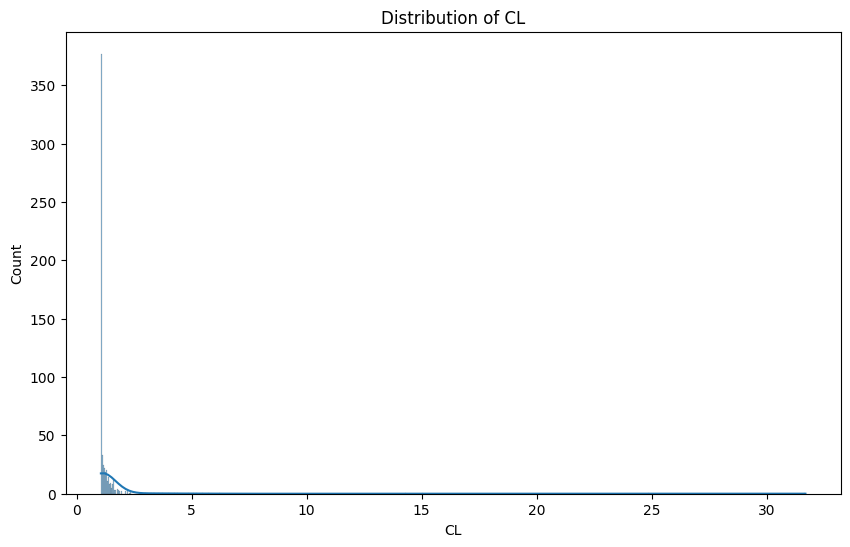

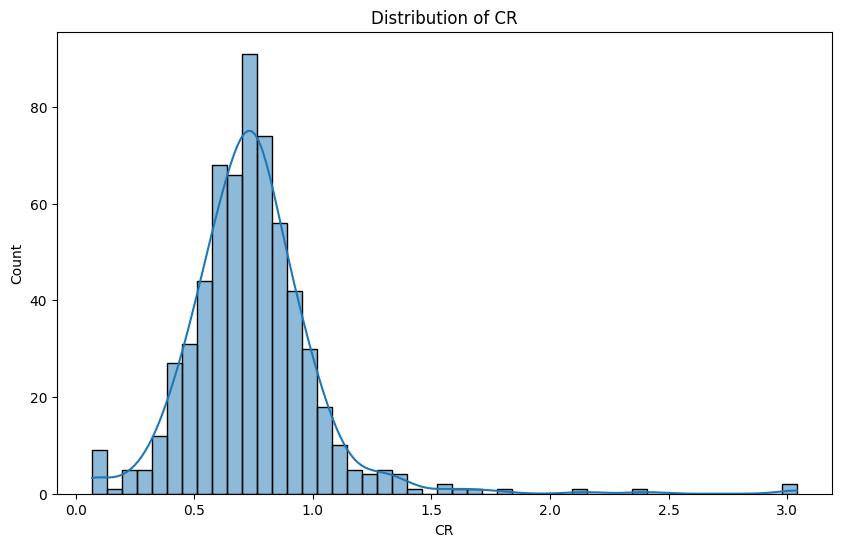

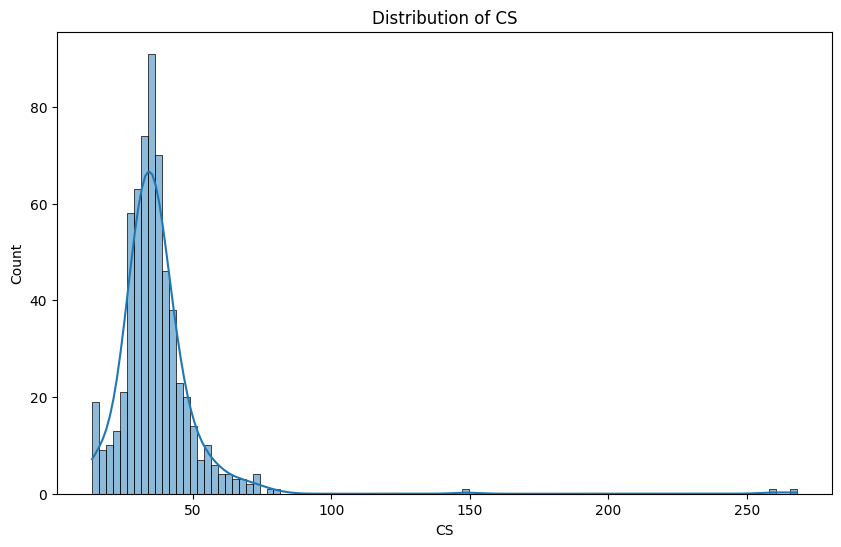

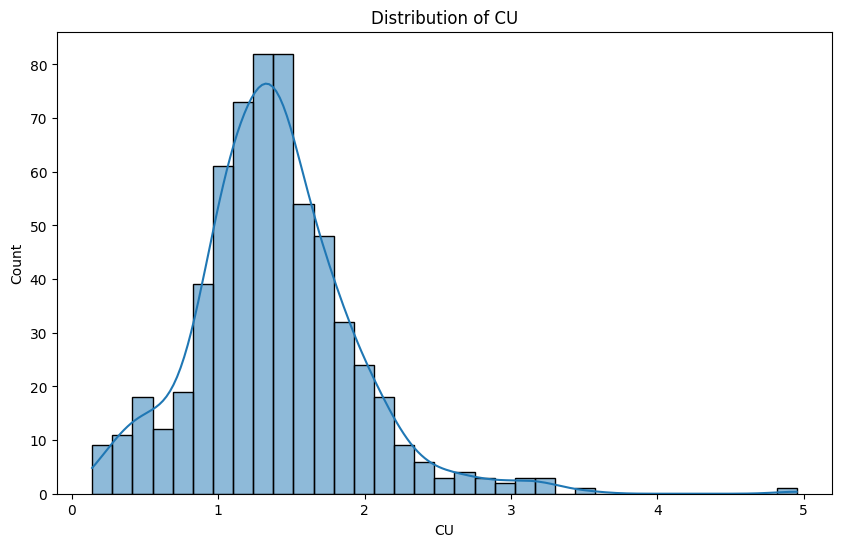

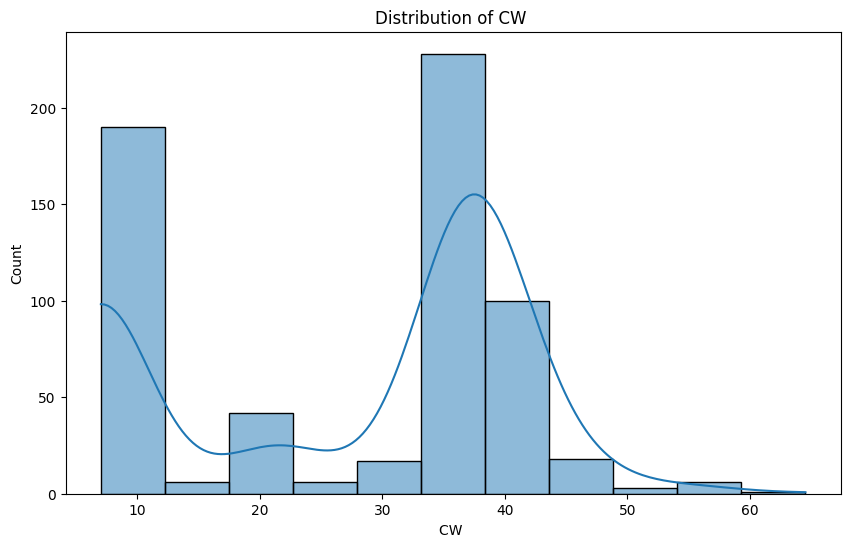

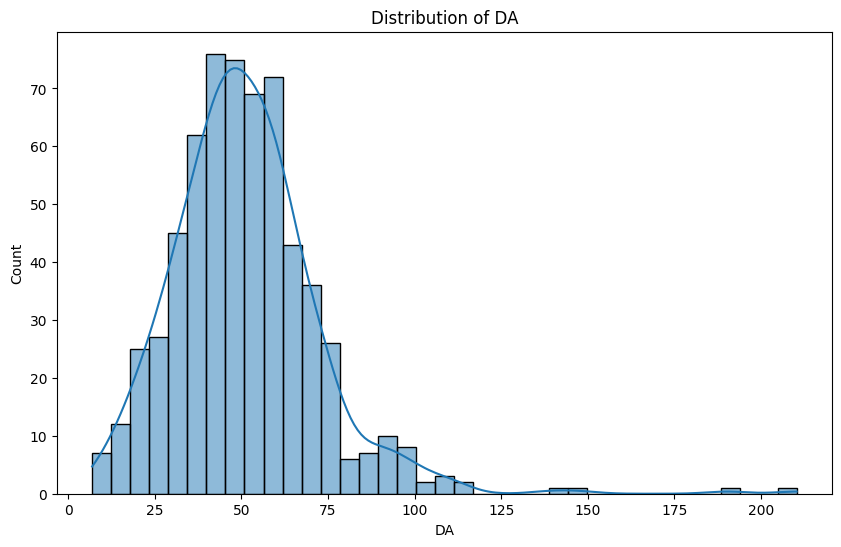

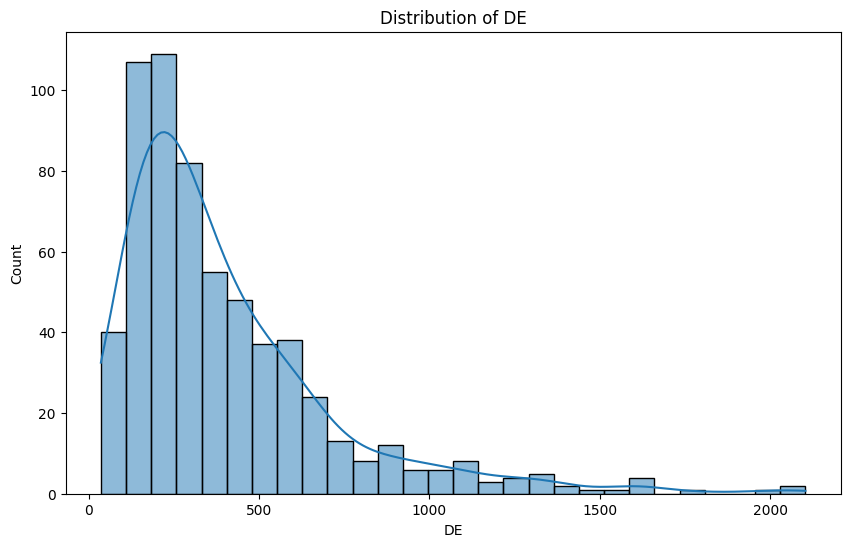

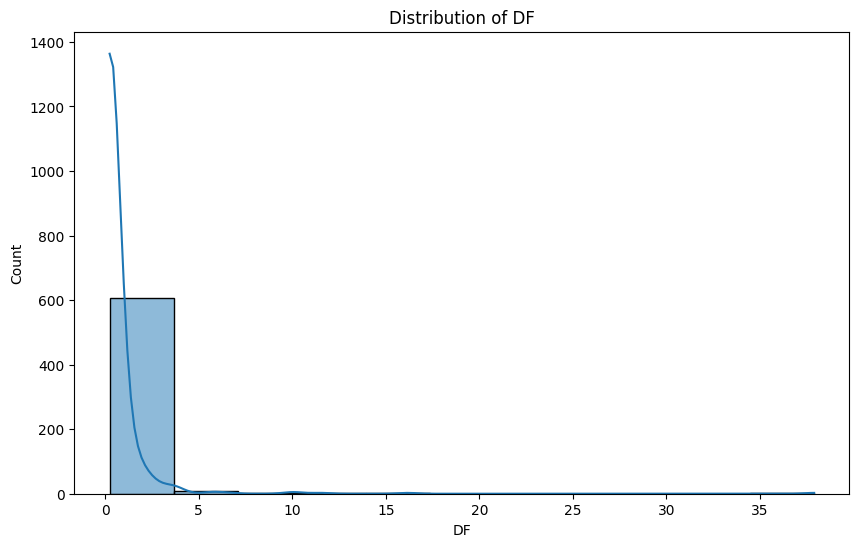

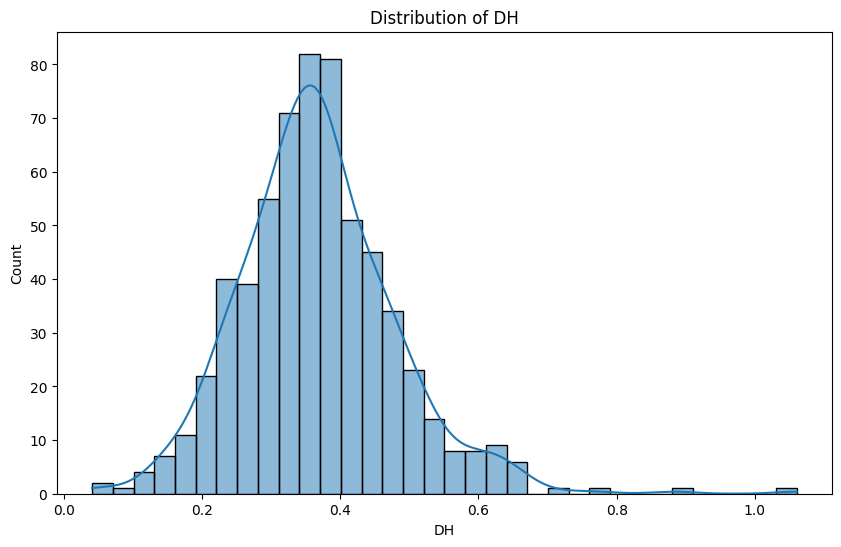

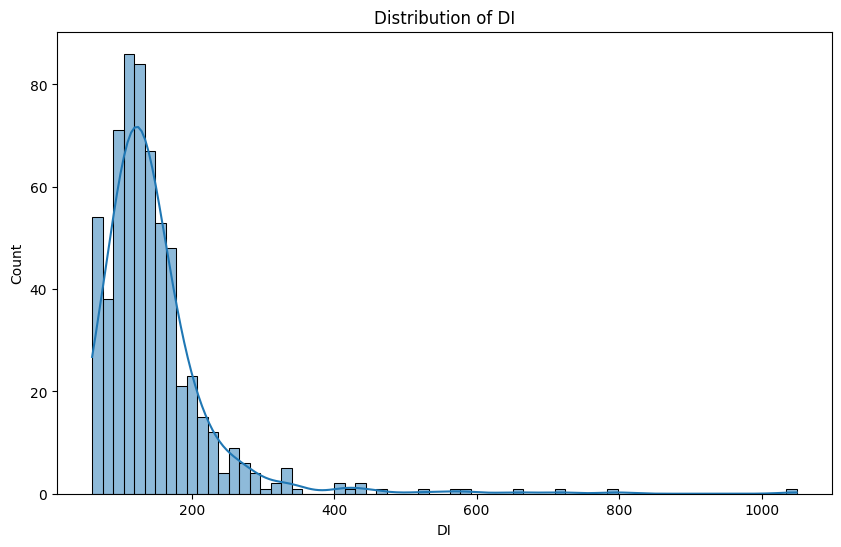

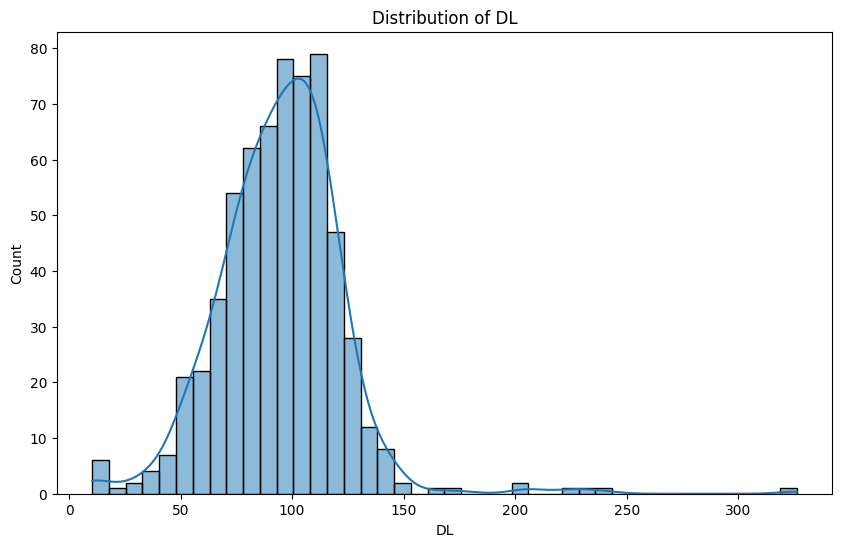

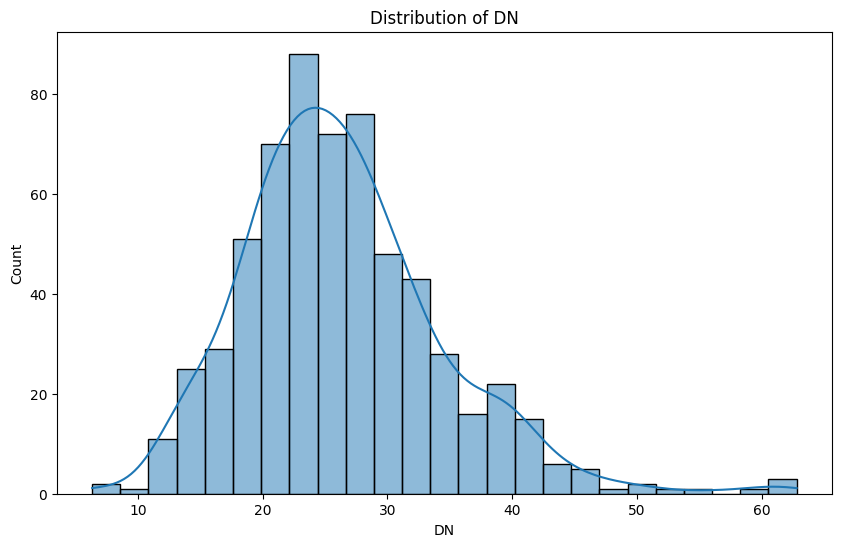

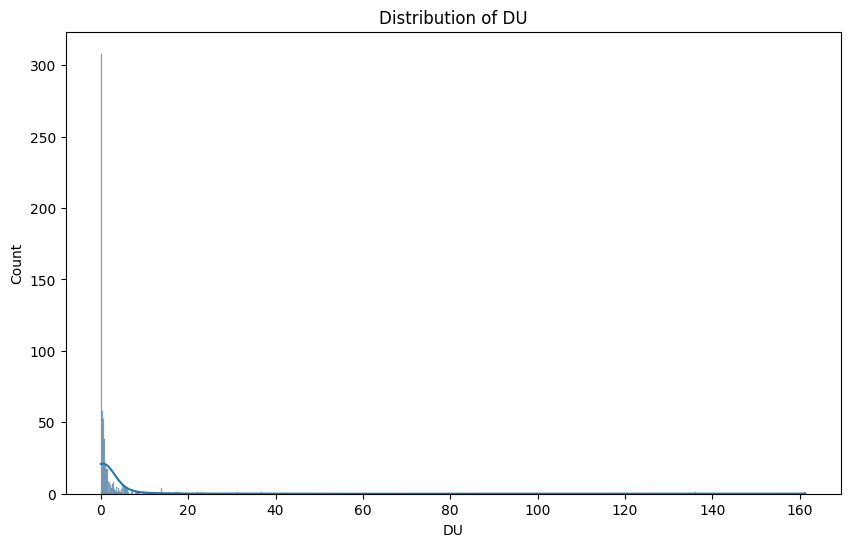

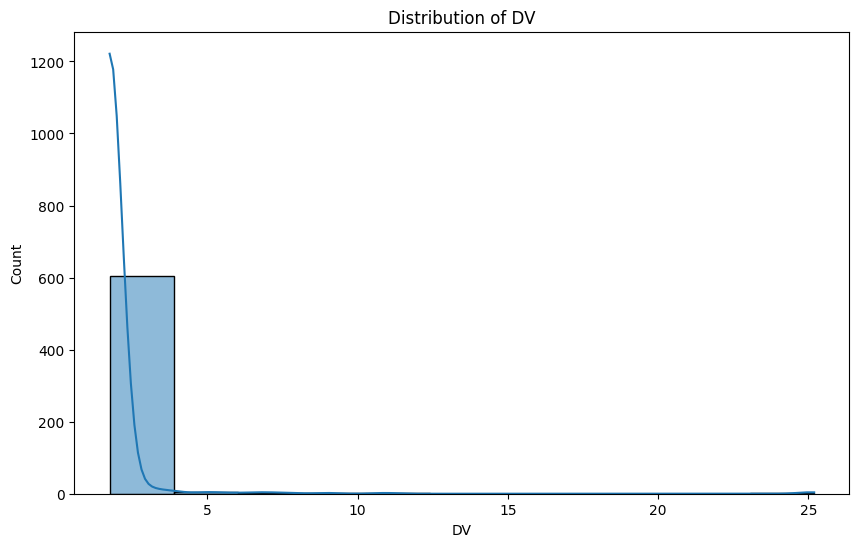

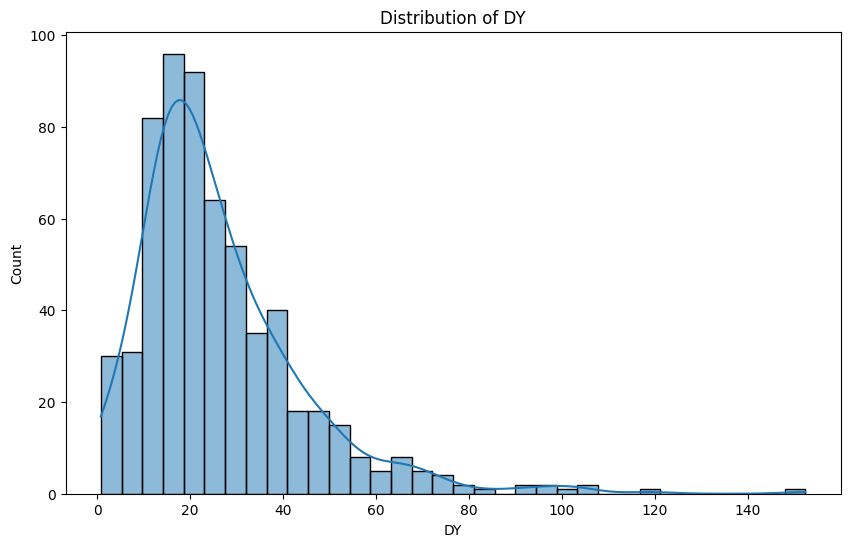

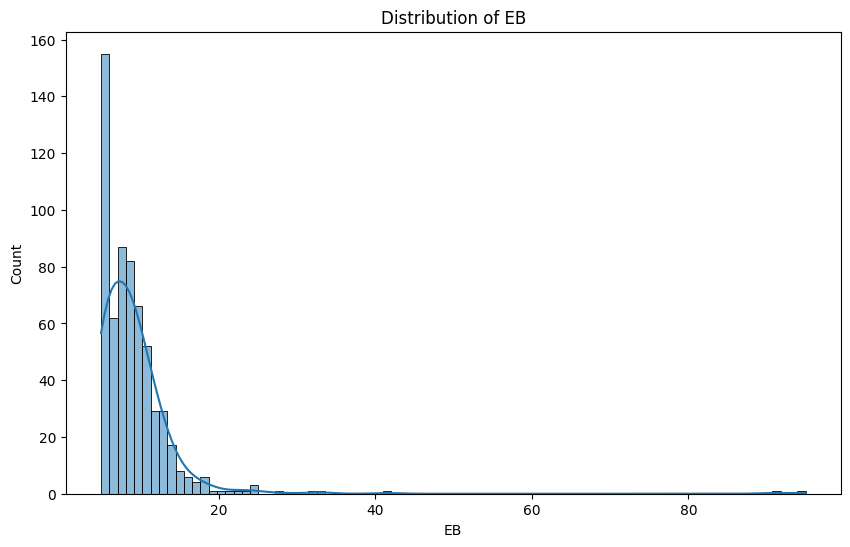

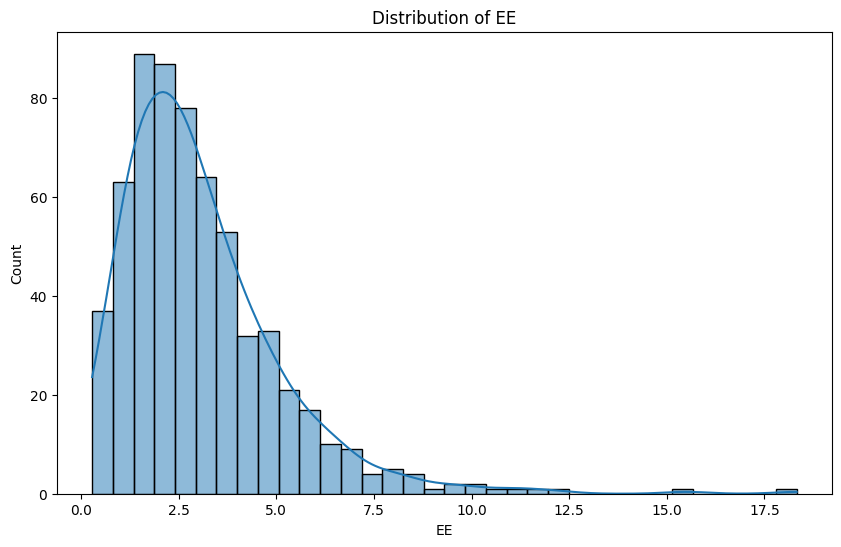

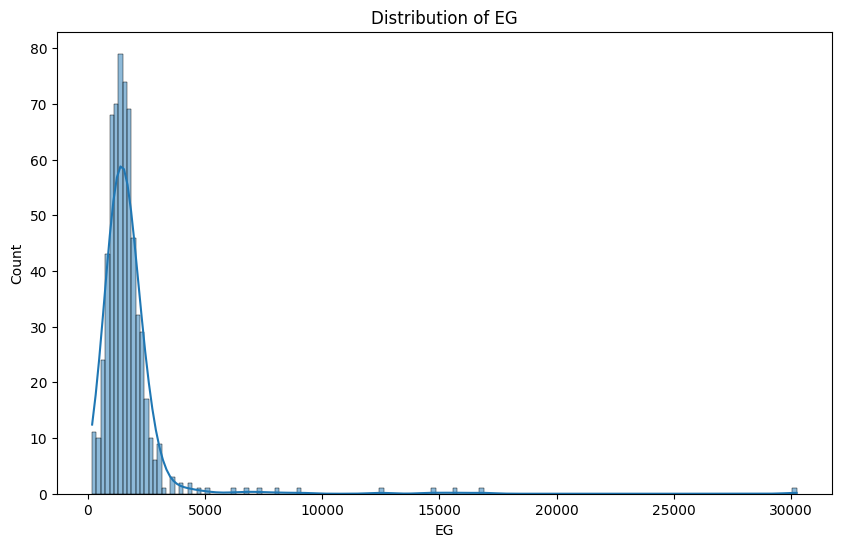

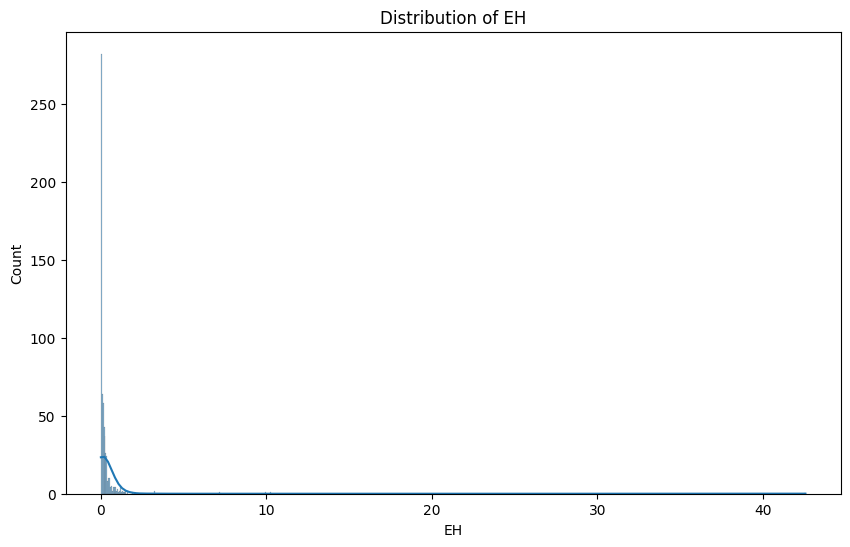

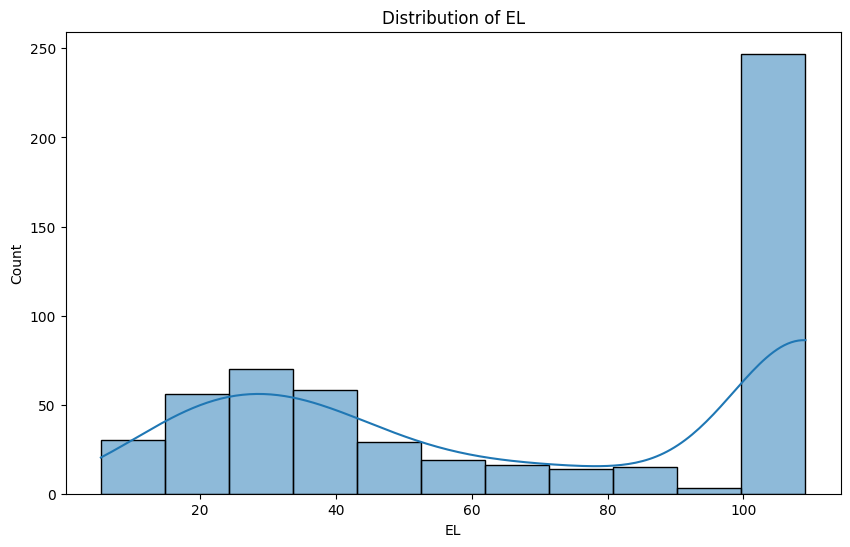

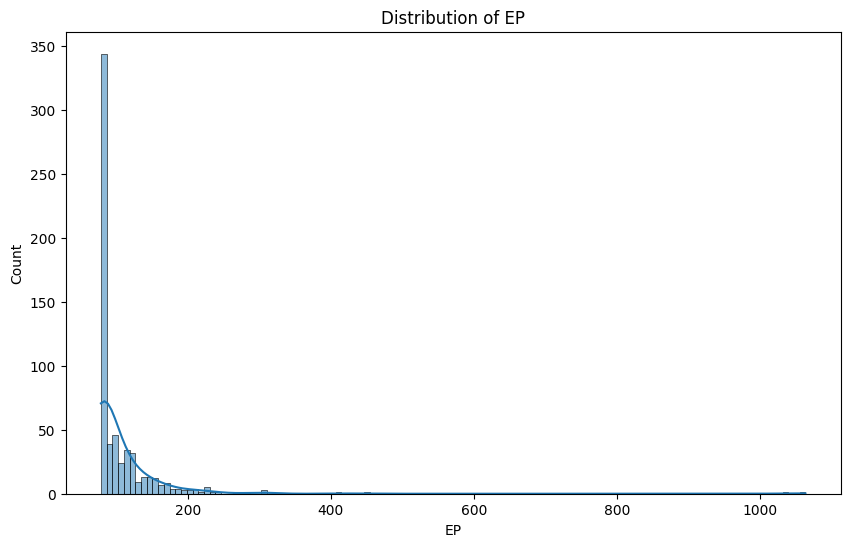

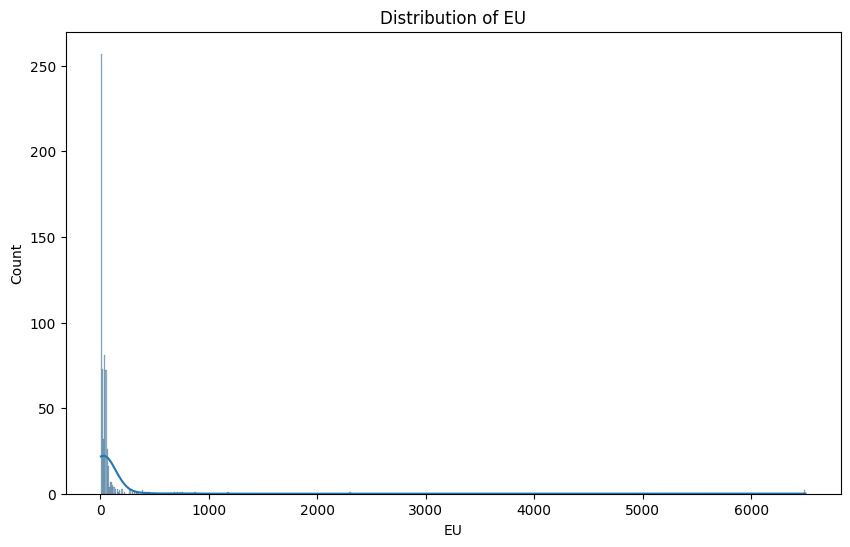

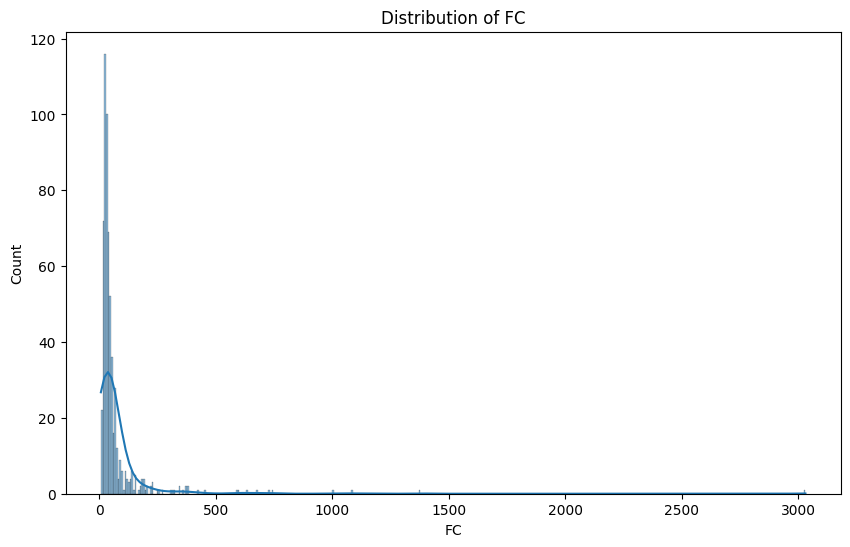

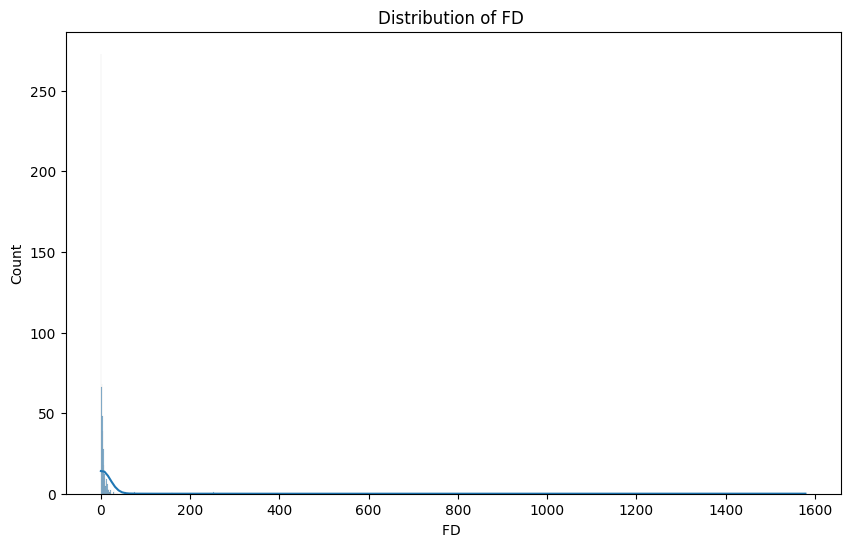

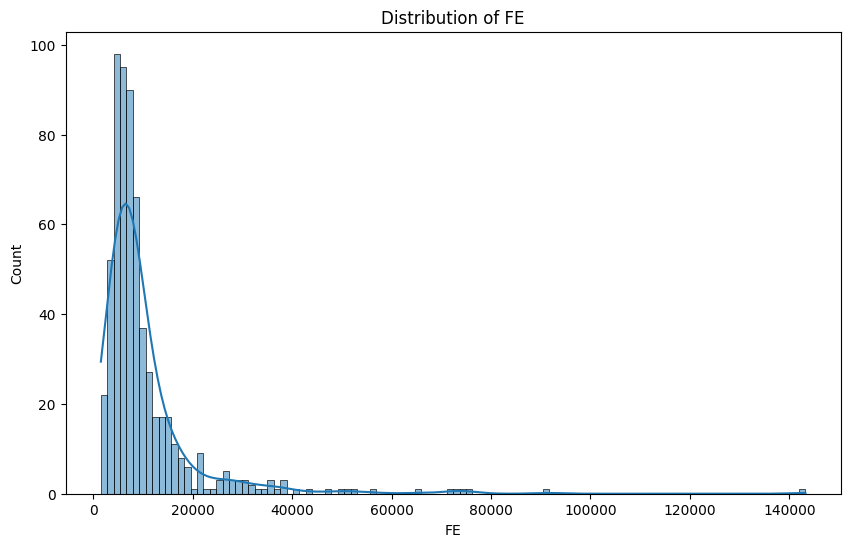

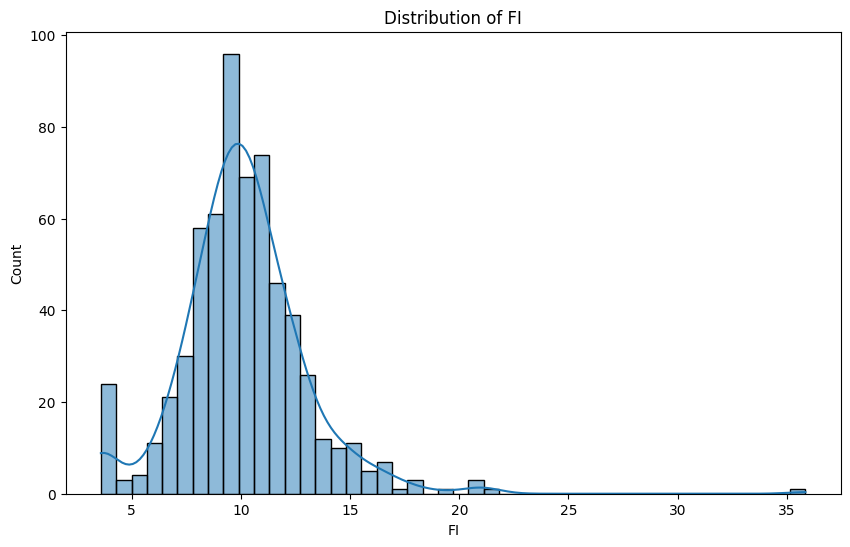

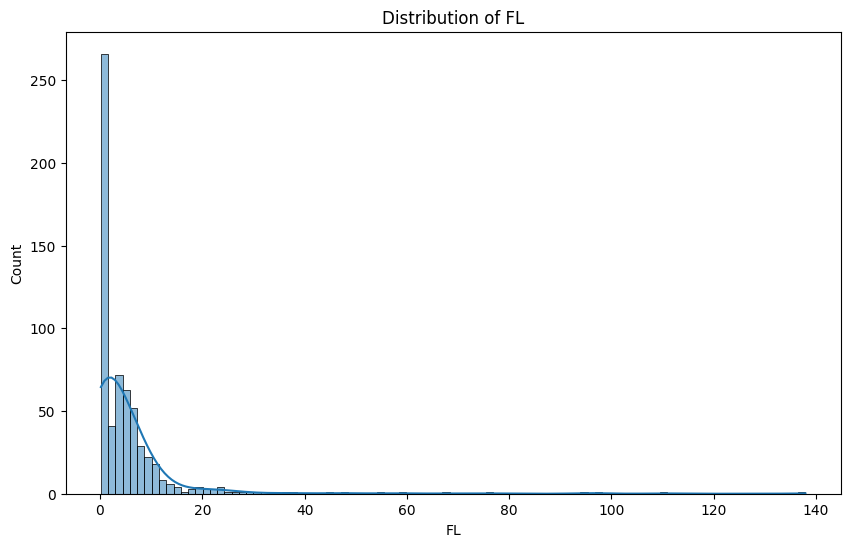

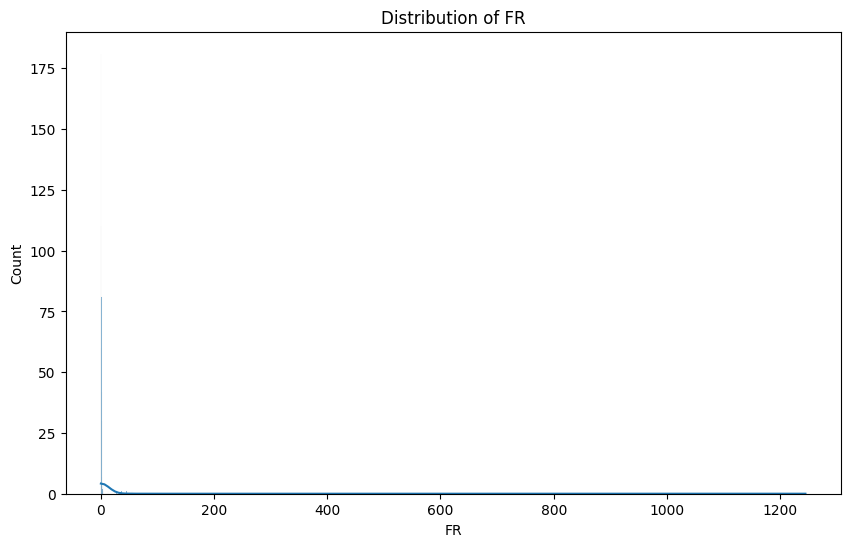

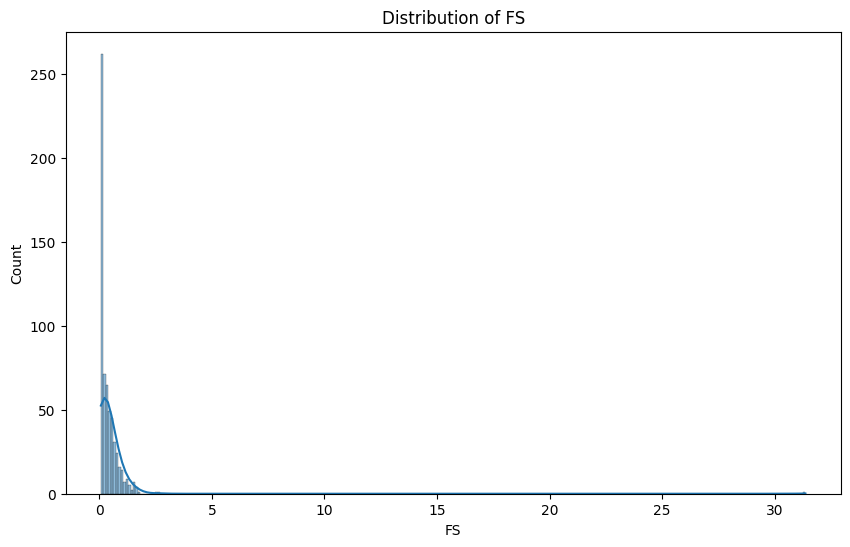

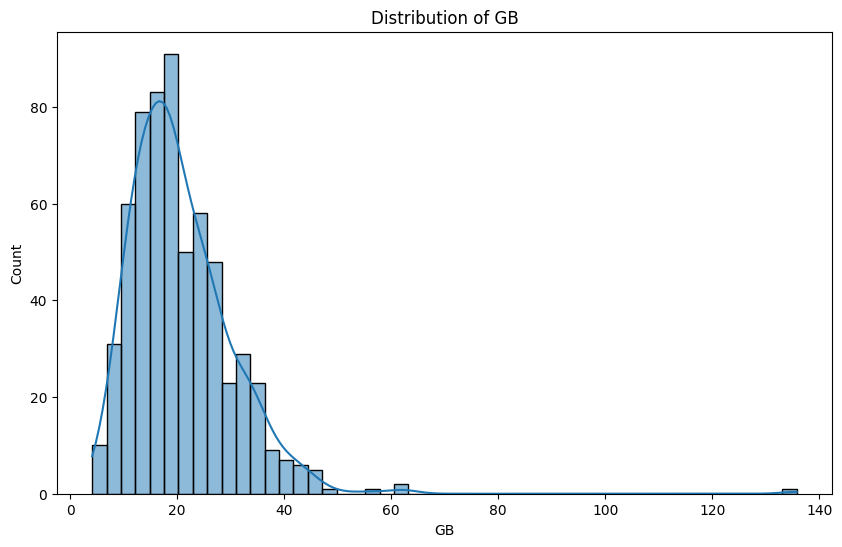

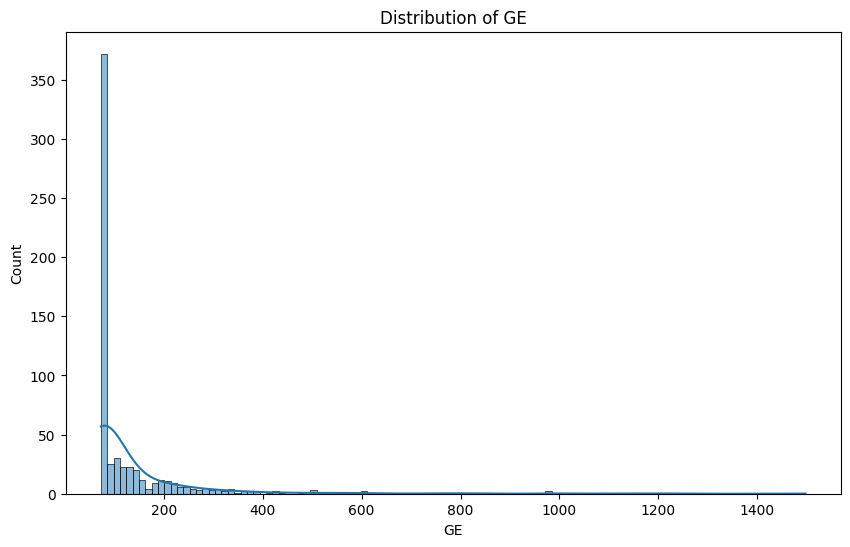

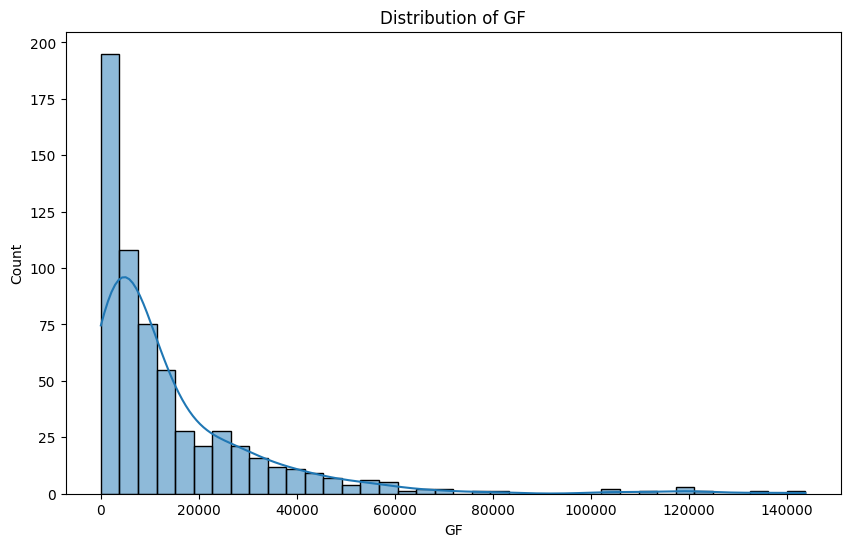

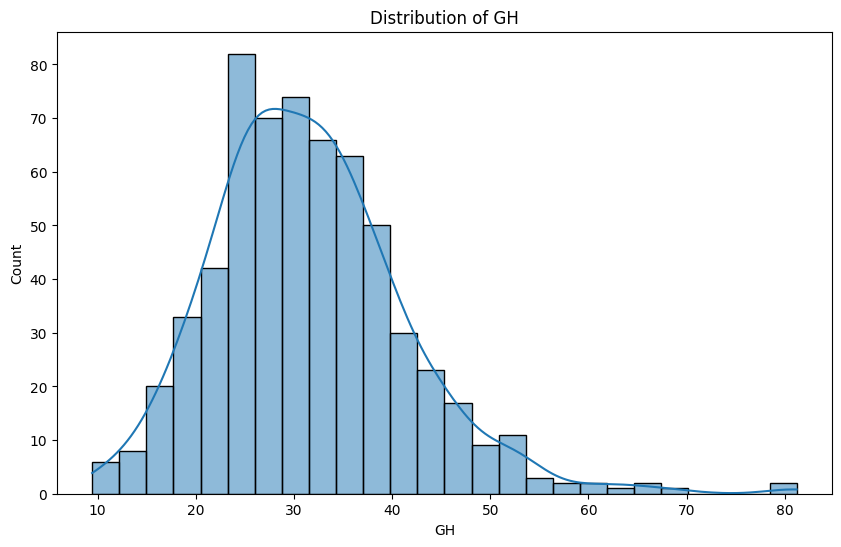

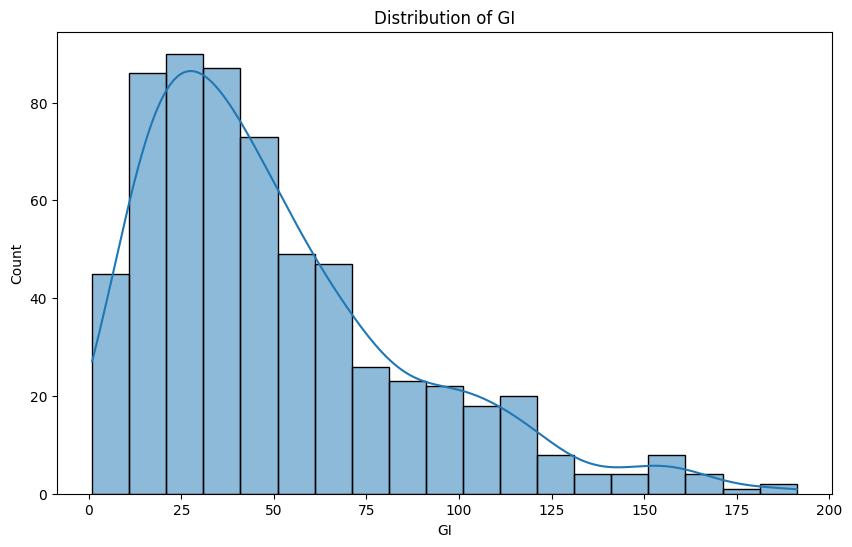

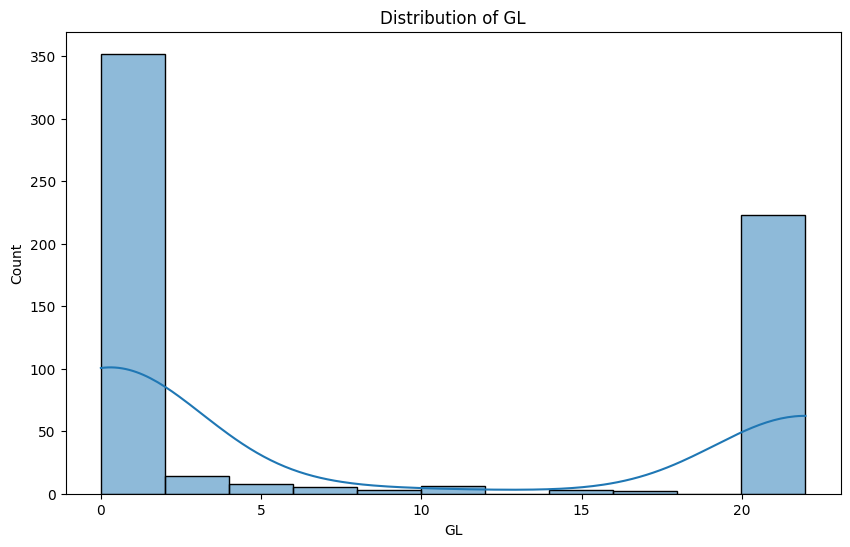

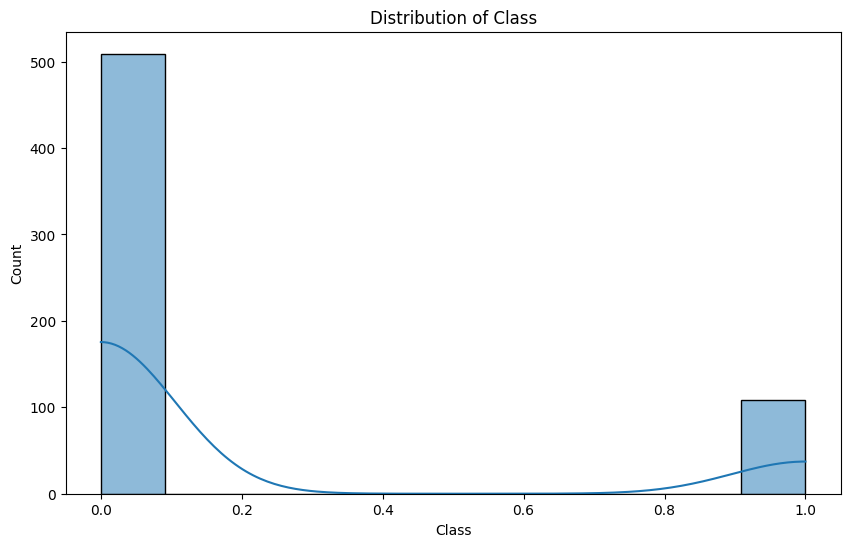

In [47]:
# Visualize the distribution of numerical features
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train_data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Handling Missing Data

In [48]:
#I want to fill the missing data with most frequent

# Assuming your data is in a DataFrame called 'train_data'

# Create the imputer object with constant strategy and fill_value=0
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Fill all missing values with 0
train_data_filled = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)

In [49]:
#turn column EJ to number

# Assuming your data is in a DataFrame called 'train_data'

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the "EJ" column
train_data_filled["EJ"] = label_encoder.fit_transform(train_data_filled["EJ"])
train_data_filled["Class"] = train_data_filled['Class'].astype(int)

# If needed, replace the original "EJ" column with the encoded values
# train_data.drop("EJ", axis=1, inplace=True)

# Display the updated DataFrame
print(train_data_filled)

               Id        AB          AF          AH          AM         AR   
0    000ff2bfdfe9  0.209377  3109.03329   85.200147   22.394407   8.138688  \
1    007255e47698  0.145282   978.76416   85.200147   36.968889   8.138688   
2    013f2bd269f5   0.47003  2635.10654   85.200147   32.360553   8.138688   
3    043ac50845d5  0.252107  3819.65177  120.201618   77.112203   8.138688   
4    044fb8a146ec  0.380297  3733.04844   85.200147   14.103738   8.138688   
..            ...       ...         ...         ...         ...        ...   
612  fd3dafe738fd  0.149555  3130.05946  123.763599    9.513984  13.020852   
613  fd895603f071  0.435846  5462.03438   85.200147   46.551007  15.973224   
614  fd8ef6377f76    0.4273   2459.1072  130.138587   55.355778  10.005552   
615  fe1942975e40  0.363205  1263.53524   85.200147   23.685856   8.138688   
616  ffcca4ded3bb  0.482849  2672.53426   546.66393  112.006102   8.138688   

           AX        AY         AZ         BC         BD       

In [50]:
X = train_data_filled.drop(['Class', 'Id'], axis = 1)
y = train_data_filled['Class']

model = RandomForestClassifier()
feature_selector = SelectFromModel(model)
X_selected = feature_selector.fit_transform(X, y)

In [51]:
# Standardize the selected features
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# Outlier detection using LocalOutlierFactor
outlier_detector = LocalOutlierFactor(contamination=0.05)
outliers = outlier_detector.fit_predict(X_selected_scaled)

# Filter out outliers from the selected features and target variable
X_filtered = X_selected[outliers != -1]
y_filtered = y[outliers != -1]

In [52]:
X_filtered.shape

(586, 17)

In [53]:
selected_indices = feature_selector.get_support(indices=True)
chosen_columns = X.columns[selected_indices]
print(chosen_columns)

Index(['AB', 'AF', 'AM', 'BC', 'BQ', 'CR', 'DA', 'DE', 'DI', 'DU', 'EE', 'EH',
       'FD ', 'FI', 'FL', 'FR', 'GL'],
      dtype='object')


In [54]:
# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.923728813559322


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Classifier model
model = RandomForestClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

# #Processing Test Data

In [ ]:
# Load the training data
test_data = pd.read_csv(path + 'test.csv')

#I want to fill the missing data with most frequent

# Assuming your data is in a DataFrame called 'train_data'

# Create the imputer object with constant strategy and fill_value=0
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Fill all missing values with 0
test_data_filled = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)

#turn column EJ to number

# Assuming your data is in a DataFrame called 'train_data'

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the "EJ" column
test_data_filled["EJ"] = label_encoder.fit_transform(test_data_filled["EJ"])

# If needed, replace the original "EJ" column with the encoded values
# train_data.drop("EJ", axis=1, inplace=True)

X_test = test_data_filled[chosen_columns]
# Standardize the selected features
scaler = StandardScaler()
X_test_selected_scaled = scaler.fit_transform(X_test)

# Make predictions on the test data
predictions = best_model.predict(X_test_selected_scaled)

# Optionally, you can also obtain the predicted probabilities for each class
probabilities = best_model.predict_proba(X_test_selected_scaled)

# print("Predictions:")
# print(predictions)

print("\nProbabilities:")
print(probabilities)



In [ ]:
# Create a DataFrame for the submission
submission = pd.DataFrame({'Id': test_data_filled['Id'], 'class_0': probabilities[:, 0], 'class_1': probabilities[:, 1]})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)


In [ ]:
ss = pd.read_csv(path + 'sample_submission.csv')
ss.head(100)

In [ ]:
# Drop the 'Id' column and irrelevant columns from the feature set
train_data = train.drop(['Id'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on the 'EJ' column
label_encoder = LabelEncoder()
train_data['EJ'] = label_encoder.fit_transform(train_data['EJ'])
train_data.head(5)

In [ ]:
X = train_data.drop('Class', axis=1)
y = train_data['Class']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object with the strategy to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training and validation data by replacing missing values with the mean
X_train_imputed = imputer.transform(X_train)
X_val_imputed = imputer.transform(X_val)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a new Random Forest classifier
classifier = RandomForestClassifier()

# Train the classifier on the imputed training data
classifier.fit(X_train_imputed, y_train)

# Evaluate the classifier on the imputed validation data
accuracy = classifier.score(X_val_imputed, y_val)
print("Validation Accuracy:", accuracy)



In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the test data from the 'test.csv' file
test_data = pd.read_csv(path + 'test.csv')

# Extract the feature columns from the test data
X_test = test_data.drop(['Id'], axis=1)  # Exclude the 'Id' and 'EJ' columns

# Encode the 'EJ' column using label encoding
label_encoder = LabelEncoder()
X_test['EJ'] = label_encoder.fit_transform(X_test['EJ'])

# Impute missing values in the test data
X_test_imputed = imputer.transform(X_test)

# Add the encoded 'EJ' column back to the feature data
X_test_imputed_encoded = X_test_imputed

# Make predictions on the test data
predictions = classifier.predict(X_test_imputed_encoded)

# Optionally, you can also obtain the predicted probabilities for each class
probabilities = classifier.predict_proba(X_test_imputed_encoded)

print("Predictions:")
print(predictions)

print("\nProbabilities:")
print(probabilities)

Predictions:
[1 1 1 1 1]

Probabilities:
[[0.47 0.53]
 [0.47 0.53]
 [0.47 0.53]
 [0.47 0.53]
 [0.47 0.53]]


In [17]:
# Create a DataFrame for the submission
submission = pd.DataFrame({'Id': test_data['Id'], 'class_0': probabilities[:, 0], 'class_1': probabilities[:, 1]})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

In [15]:
ss = pd.read_csv(path + 'sample_submission.csv')
ss.head(5)

,Id,class_0,class_1
0,00eed32682bb,0.5,0.5
1,010ebe33f668,0.5,0.5
2,02fa521e1838,0.5,0.5
3,040e15f562a2,0.5,0.5
4,046e85c7cc7f,0.5,0.5


In [16]:
replicator(ss.head())

,Id,class_0,class_1
0,00eed32682bb,0.5,0.5
1,010ebe33f668,0.5,0.5
2,02fa521e1838,0.5,0.5
3,040e15f562a2,0.5,0.5
4,046e85c7cc7f,0.5,0.5
